# Exploraroty Work On School Ratings

In [1]:
#The following routine combines all data: school, flood, crime, HCAD into one dataframe
# It also explores the impact of school rating in the different variables
# The ouput is the dataframe to be used in the final routine

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps
import numpy as np
import seaborn as sns


from config import gkey
gmaps.configure(api_key=gkey)

### Import Data Files And Merge

In [3]:
# read file with school, flood, and crime data and make it into a dataframe
file1 = pd.read_csv("Resources/combined_flood_crime_and_school_data.csv")
df1 = pd.DataFrame(file1)

In [4]:
# read file with home values and make it into a dataframe
file2 = pd.read_csv("Resources/Inner_Loop_18_19.csv")
df2 = pd.DataFrame(file2)

In [5]:
# rename joining columns to match df1
df2 = df2.rename(columns={'NEIGHBORHOOD_CODE_2019':"NEIGHBORHOOD_CODE","NEIGHBORHOOD_GROUP_2019":"NEIGHBORHOOD_GROUP"})

In [6]:
# merge the two dataframes
data = pd.merge(df1,df2,how='left',on=["ACCOUNT","NEIGHBORHOOD_CODE","NEIGHBORHOOD_GROUP"])

In [7]:
#cleaning unwanted columnns from DataFrame
del data['Unnamed: 0_x']
del data['Unnamed: 0.1']
del data['Unnamed: 0_y']
del data['TOTAL_BUILDING_AREA_y']
del data['TOTAL_LAND_AREA_y']
del data['ACREAGE_y']

data.rename(columns={'TOTAL_BUILDING_AREA_x':'TOTAL_BUILDING_AREA',
                    'TOTAL_LAND_AREA_x':'TOTAL_LAND_AREA',
                    'ACREAGE_x':'ACREAGE',
                    'SITE_ADDR_3':"Zip Code"}, inplace = True)

data.to_csv("Output/combined_data.csv")
data.columns

Index(['Address', 'Latitude', 'Longitude', 'Flood Description', 'Flood Zone',
       'Flood Risk', 'SITE_ADDR_1', 'ACCOUNT', 'TAX_YEAR', 'SITE_ADDR_2',
       'Zip Code', 'STATE_CLASS', 'SCHOOL_DIST', 'NEIGHBORHOOD_CODE',
       'NEIGHBORHOOD_GROUP', 'MARKET_AREA_1_DSCR', 'MARKET_AREA_2_DSCR',
       'TOTAL_BUILDING_AREA', 'TOTAL_LAND_AREA', 'ACREAGE', 'LAND_VALUE',
       'ASSESSED_VALUE', 'TOTAL_APPRAISED_VALUE', 'TOTAL_MARKET_VALUE',
       'LAST_INSPECTED_DATE', 'NEW_OWNER_DATE', 'Offense Count', 'crime_rank',
       'Elementary Public School ID', 'Elementary Public School Name',
       'Elementary Public School Rating', 'Elementary Charter School ID',
       'Elementary Charter School Name', 'Elementary Charter School Rating',
       'Public Middle School ID', 'Public Middle School Name',
       'Public Middle School Rating', 'Charter Middle School ID',
       'Charter Middle School Name', 'Charter Middle School Rating',
       'Public High School ID', 'Public High School Name',
 

### Compare School Ratings Vs. Total Appraised Value

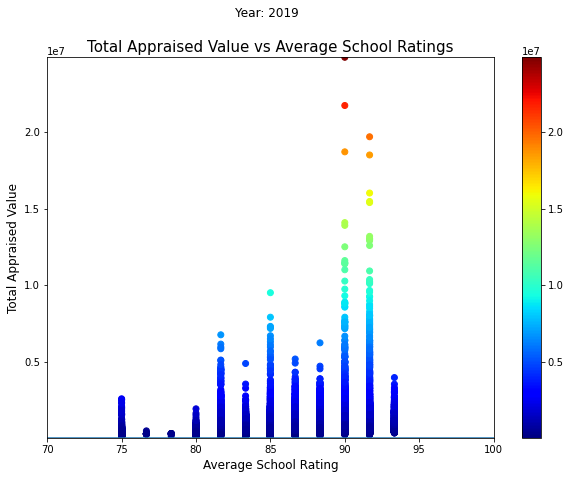

In [8]:
# plot average school ratings vs property values
fig1,ax = plt.subplots(figsize=(10,7))
chart1 = ax.scatter(
    data['Average School Rating'],data["TOTAL_APPRAISED_VALUE"],c=data["TOTAL_APPRAISED_VALUE"],
    cmap=plt.cm.jet)
fig1.colorbar(chart1, ax=ax)
plt.plot(data['Average School Rating'])
plt.xlabel('Average School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average School Ratings", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(data["TOTAL_APPRAISED_VALUE"].min(),data["TOTAL_APPRAISED_VALUE"].max())
plt.show()

### Evaluate Trends In All Schools In Harris County, TX

In [9]:
# import data for school in all of Harris County
file3 = pd.read_csv("Resources/Schools_Ratings_Harris_Co.csv")
df3 = pd.DataFrame(file3)
df3.head()

,Unnamed: 0,School.ID,School.Name,Street.Address,CITY,ZIP,County,District.Name,School.Type,Charter.Trad,...,Math.Current-2,Math.Change,Student.Growth.Reading,Student.Growth.Math,School.Program,Community.Resources,longitude,latitude,Student.Teacher.Ratio,Grade.Range
0,23,101871041,A+ UNLIMITED POTENTIAL MIDDLE,5100 MONTROSE,HOUSTON,77006.0,HARRIS,A+ UNLIMITED POTENTIAL,Middle,Charter,...,NaN,NaN,MEDIUM,LOW,NaN,NaN,-95.391398,29.727426,22.0,06—08
1,43,101810002,ACADEMY OF ACCELERATED LEARNING ELEMENTARY,6711 BELLFORT ST,HOUSTON,77087.0,HARRIS,ACADEMY OF ACCELERATED LEARNING INC,Elementary,Charter,...,31.720430,VARIED,HIGH,HIGH,(Unavailable),9999,-95.311151,29.668447,17.0,PK—05
2,48,101849101,ACCELERATED INTERDISCIPLINARY ACADEMY ELEMENTARY,12825 SUMMIT RIDGE DR,HOUSTON,77085.0,HARRIS,ACCELERATED INTERMEDIATE ACADEMY,Elementary,Charter,...,52.631579,INCREASED,HIGH,HIGH,(Unavailable),9999,-95.484785,29.636619,14.0,PK—06
3,56,101907107,ADAM ELEMENTARY,11303 HONEYGROVE LN,HOUSTON,77065.0,HARRIS,CYPRESS-FAIRBANKS ISD,Elementary,Traditional Public School,...,49.612403,VARIED,MEDIUM,MEDIUM,NaN,NaN,-95.603242,29.926556,16.0,PK—05
4,81,101905043,AGUIRRE JUNIOR HIGH,15726 WALLISVILLE RD,HOUSTON,77049.0,HARRIS,CHANNELVIEW ISD,Middle,Traditional Public School,...,32.142857,INCREASED,HIGH,MEDIUM,NaN,NaN,-95.156563,29.809586,18.0,06—08


In [10]:
# Convert ratings to numbers
df3["School Rating"] = ""
df3.loc[df3["TEA Grade"]=="A", "School Rating"]=95
df3.loc[df3["TEA Grade"]=="B", "School Rating"]=85
df3.loc[df3["TEA Grade"]=="C", "School Rating"]=75
df3.loc[df3["TEA Grade"]=="D", "School Rating"]=65
df3.loc[df3["TEA Grade"]=="F", "School Rating"]=55

In [11]:
# create a heat map of school rantings for all of Harris County
locations_2 = df3[["latitude","longitude"]]
county_ratings = df3["School Rating"]

figure_layout = {"width":"900px",
                 "height":"500px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig2 = gmaps.figure(layout=figure_layout)
county_layer = gmaps.heatmap_layer(locations_2,weights=county_ratings,dissipating=False)
fig2.add_layer(county_layer)
fig2

Figure(layout=FigureLayout(border='1px solic black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [12]:
county_layer.max_intensity = 94
county_layer.min_intensity = 55
county_layer.point_radius = 0.005

### Evaluate Trends In All Schools Within Inner Loop Subset

In [13]:
# create a heat map of school rantings 
locations = data[["Latitude","Longitude"]]
school_ratings = data['Average School Rating']

figure_layout = {"width":"900px",
                 "height":"500px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig3 = gmaps.figure(layout=figure_layout)
school_layer = gmaps.heatmap_layer(locations,weights=school_ratings,dissipating=False)
fig3.add_layer(school_layer)
fig3

Figure(layout=FigureLayout(border='1px solic black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [14]:
school_layer.max_intensity = max(data['Average School Rating'])
school_layer.point_radius = 0.0003

### All Schools By Zip Codes

In [15]:
# group all schools by zip code
zip_code = data[['Zip Code',"Average School Rating",'TOTAL_APPRAISED_VALUE']]
zip_code_group = zip_code.groupby(["Zip Code"]).mean()
zip_code_group

,Average School Rating,TOTAL_APPRAISED_VALUE
Zip Code,,
77002,80.234375,4.297190e+05
77005,88.478331,1.227768e+06
77006,82.070835,6.134448e+05
77019,84.284489,1.382767e+06
77025,86.706992,5.355371e+05
77027,91.879523,1.105475e+06
77030,86.520387,8.322422e+05
77054,80.007424,2.486211e+05
77098,84.418930,5.519465e+05


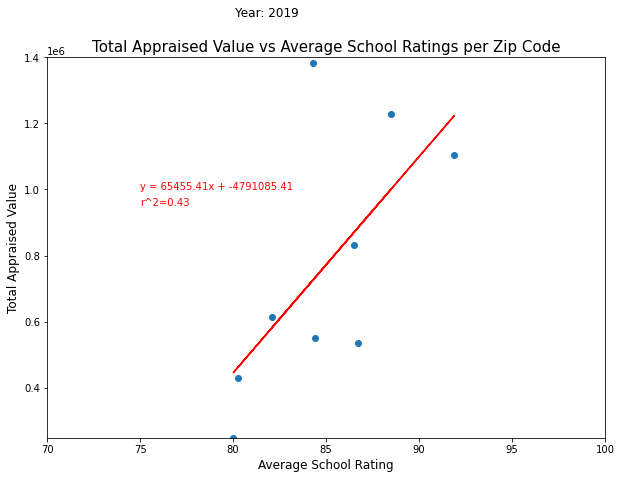

In [16]:
# plot average school ratings vs property values and add a linear regression
correlation = st.pearsonr(zip_code_group["Average School Rating"],zip_code_group["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(zip_code_group["Average School Rating"],
                                                           zip_code_group["TOTAL_APPRAISED_VALUE"])
regress_values = zip_code_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig4,ax = plt.subplots(figsize=(10,7))
chart4 = ax.scatter(zip_code_group['Average School Rating'],zip_code_group["TOTAL_APPRAISED_VALUE"])
plt.plot(zip_code_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.95e6),fontsize=10,color='red')
plt.xlabel('Average School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average School Ratings per Zip Code", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(zip_code_group["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()

### Public Schools Inner Loop Subset

In [17]:
# slice the data for public schools
public_schools = data[["Elementary Public School Rating","Public Middle School Rating","Public High School Rating",
                       'TOTAL_APPRAISED_VALUE','Zip Code',"NEIGHBORHOOD_GROUP"]]
public_schools["Average School Rating"]=public_schools[["Elementary Public School Rating","Public Middle School Rating",
                                                  "Public High School Rating"]].mean(axis=1)

<ipython-input-17-f152cfb84cdd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_schools["Average School Rating"]=public_schools[["Elementary Public School Rating","Public Middle School Rating",


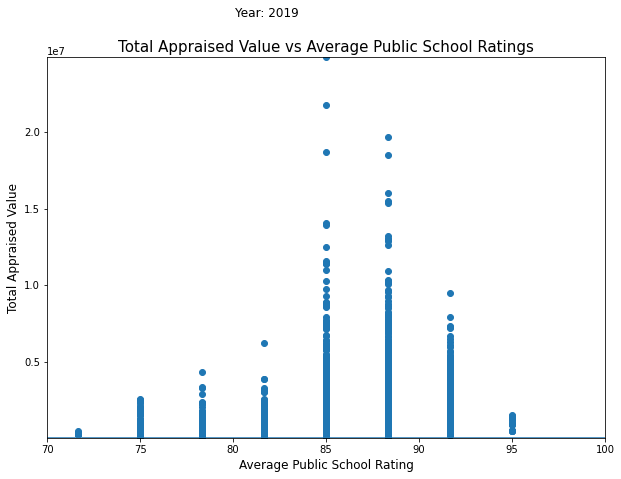

In [18]:
# plot average public school ratings vs property values
fig5,ax = plt.subplots(figsize=(10,7))
chart5 = ax.scatter(public_schools['Average School Rating'],public_schools["TOTAL_APPRAISED_VALUE"])
plt.plot(public_schools['Average School Rating'])
plt.xlabel('Average Public School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Public School Ratings", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(public_schools["TOTAL_APPRAISED_VALUE"].min(),public_schools["TOTAL_APPRAISED_VALUE"].max())
plt.show()

### Charter Schools Inner Loop Subset

In [19]:
# slice the data for charter_schools
charter_schools = data[["Elementary Charter School Rating","Charter Middle School Rating","Charter High School Rating",
                       'TOTAL_APPRAISED_VALUE','Zip Code',"NEIGHBORHOOD_GROUP"]]
charter_schools["Average School Rating"]=charter_schools[["Elementary Charter School Rating","Charter Middle School Rating",
                                                  "Charter High School Rating"]].mean(axis=1)

<ipython-input-19-19bd8a0fedae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charter_schools["Average School Rating"]=charter_schools[["Elementary Charter School Rating","Charter Middle School Rating",


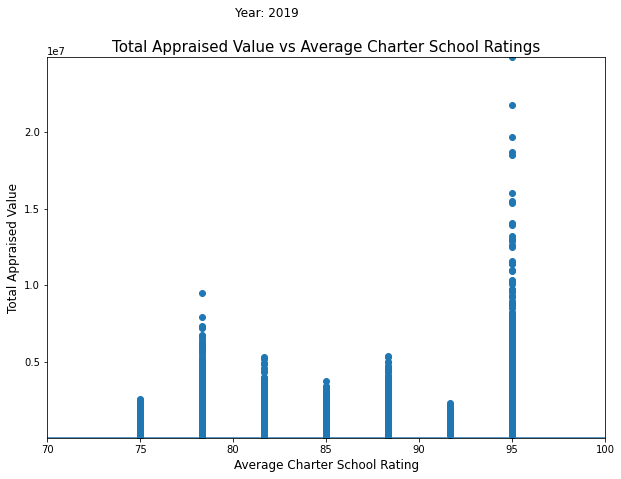

In [20]:
# plot average charter school ratings vs property values
fig6,ax = plt.subplots(figsize=(10,7))
chart6 = ax.scatter(charter_schools['Average School Rating'],public_schools["TOTAL_APPRAISED_VALUE"])
plt.plot(charter_schools['Average School Rating'])
plt.xlabel('Average Charter School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Charter School Ratings", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(charter_schools["TOTAL_APPRAISED_VALUE"].min(),charter_schools["TOTAL_APPRAISED_VALUE"].max())
plt.show()

### Public Schools By Zip Codes

In [21]:
# group public schools by zip code
public_zip_code = public_schools[['Zip Code',"Average School Rating",'TOTAL_APPRAISED_VALUE']]
public_schools_group = public_zip_code.groupby(["Zip Code"]).mean()
public_schools_group

,Average School Rating,TOTAL_APPRAISED_VALUE
Zip Code,,
77002,83.958333,4.297190e+05
77005,89.140419,1.227768e+06
77006,83.592655,6.134448e+05
77019,82.279241,1.382767e+06
77025,86.115787,5.355371e+05
77027,88.759046,1.105475e+06
77030,91.374107,8.322422e+05
77054,78.333333,2.486211e+05
77098,84.012346,5.519465e+05


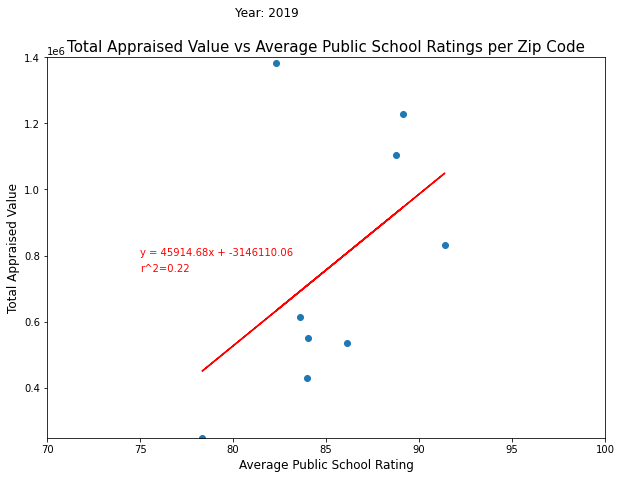

In [22]:
# plot average public school ratings vs property values per zip code and add a linear regression
correlation = st.pearsonr(public_schools_group["Average School Rating"],public_schools_group["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(public_schools_group["Average School Rating"],
                                                           public_schools_group["TOTAL_APPRAISED_VALUE"])
regress_values = public_schools_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig7,ax = plt.subplots(figsize=(10,7))
chart7 = ax.scatter(public_schools_group['Average School Rating'],public_schools_group["TOTAL_APPRAISED_VALUE"])
plt.plot(public_schools_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,0.8e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.75e6),fontsize=10,color='red')
plt.xlabel('Average Public School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Public School Ratings per Zip Code", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(public_schools_group["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()

### Charter Schools By Zip Codes

In [23]:
# group charter schools by zip code
charter_zip_code = charter_schools[['Zip Code',"Average School Rating",'TOTAL_APPRAISED_VALUE']]
charter_schools_group = charter_zip_code.groupby(["Zip Code"]).mean()
charter_schools_group

,Average School Rating,TOTAL_APPRAISED_VALUE
Zip Code,,
77002,76.510417,4.297190e+05
77005,87.816243,1.227768e+06
77006,80.549014,6.134448e+05
77019,86.289737,1.382767e+06
77025,87.298198,5.355371e+05
77027,95.000000,1.105475e+06
77030,81.666667,8.322422e+05
77054,81.681514,2.486211e+05
77098,84.825514,5.519465e+05


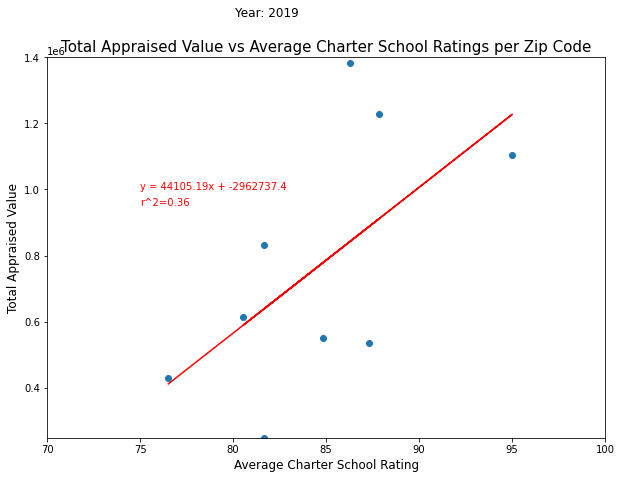

In [24]:
# plot average charter school ratings vs property values per zip code and add a linear regression
correlation = st.pearsonr(charter_schools_group["Average School Rating"],charter_schools_group["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(charter_schools_group["Average School Rating"],
                                                           charter_schools_group["TOTAL_APPRAISED_VALUE"])
regress_values = charter_schools_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig8,ax = plt.subplots(figsize=(10,7))
chart8 = ax.scatter(charter_schools_group['Average School Rating'],charter_schools_group["TOTAL_APPRAISED_VALUE"])
plt.plot(charter_schools_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.95e6),fontsize=10,color='red')
plt.xlabel('Average Charter School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Charter School Ratings per Zip Code", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(charter_schools_group["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()

### Schools By Neighborhood Group

In [25]:
# slice data by neighborhood group
neighborhood = data[['NEIGHBORHOOD_GROUP',"Average School Rating",'TOTAL_APPRAISED_VALUE']]
neighborhood_grouped = neighborhood.groupby(['NEIGHBORHOOD_GROUP']).mean()
neighborhood_grouped.head()

,Average School Rating,TOTAL_APPRAISED_VALUE
NEIGHBORHOOD_GROUP,,
0,81.666667,7.549200e+05
1200,84.787582,5.869866e+05
1201,83.405797,4.968702e+06
1202,82.337526,2.162001e+06
1203,83.513140,1.100338e+06


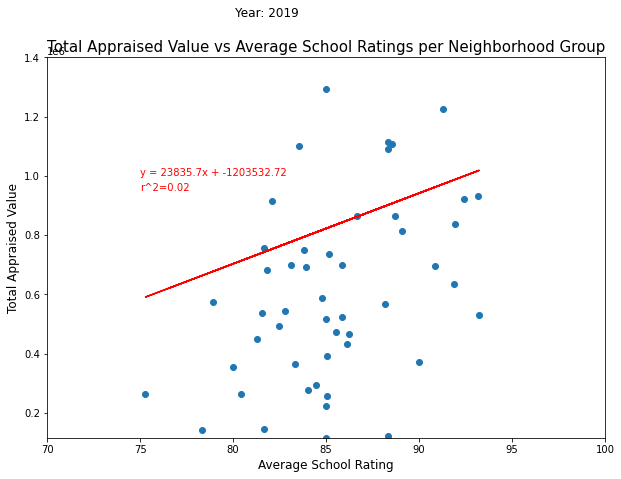

In [26]:
# plot average school ratings vs property values per neighborhood grooup and add a linear regression
correlation = st.pearsonr(neighborhood_grouped["Average School Rating"],neighborhood_grouped["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(neighborhood_grouped["Average School Rating"],
                                                           neighborhood_grouped["TOTAL_APPRAISED_VALUE"])
regress_values = neighborhood_grouped["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig9,ax = plt.subplots(figsize=(10,7))
chart9 = ax.scatter(neighborhood_grouped['Average School Rating'],neighborhood_grouped["TOTAL_APPRAISED_VALUE"])
plt.plot(neighborhood_grouped['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.95e6),fontsize=10,color='red')
plt.xlabel('Average School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average School Ratings per Neighborhood Group", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(neighborhood_grouped["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()

### Public Schools By Neighborhood Group

In [27]:
# group public schools by neighborhood group
public_neighborhood = public_schools[["NEIGHBORHOOD_GROUP","Average School Rating",'TOTAL_APPRAISED_VALUE']]
public_neighborhood_group = public_neighborhood.groupby(["NEIGHBORHOOD_GROUP"]).mean()

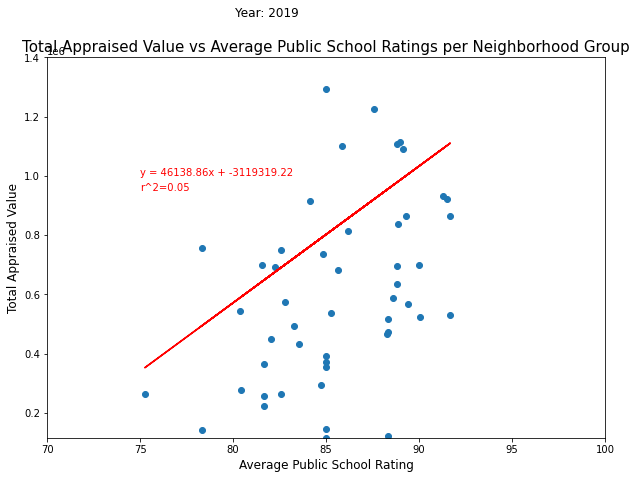

In [28]:
# plot average public school ratings vs property values per neighborhood grooup and add a linear regression
correlation = st.pearsonr(public_neighborhood_group["Average School Rating"],
                          public_neighborhood_group["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(public_neighborhood_group["Average School Rating"],
                                                           public_neighborhood_group["TOTAL_APPRAISED_VALUE"])
regress_values = public_neighborhood_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig9,ax = plt.subplots(figsize=(10,7))
chart9 = ax.scatter(public_neighborhood_group['Average School Rating'],public_neighborhood_group["TOTAL_APPRAISED_VALUE"])
plt.plot(public_neighborhood_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.95e6),fontsize=10,color='red')
plt.xlabel('Average Public School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Public School Ratings per Neighborhood Group", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(public_neighborhood_group["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()

### Charter Schools By Neighborhood Group

In [29]:
# group charter schools by neighborhood group
charter_neighborhood = charter_schools[["NEIGHBORHOOD_GROUP","Average School Rating",'TOTAL_APPRAISED_VALUE']]
charter_neighborhood_group = charter_neighborhood.groupby(["NEIGHBORHOOD_GROUP"]).mean()
charter_neighborhood_group.head()

,Average School Rating,TOTAL_APPRAISED_VALUE
NEIGHBORHOOD_GROUP,,
0,85.000000,7.549200e+05
1200,80.969499,5.869866e+05
1201,78.333333,4.968702e+06
1202,78.731656,2.162001e+06
1203,81.203320,1.100338e+06


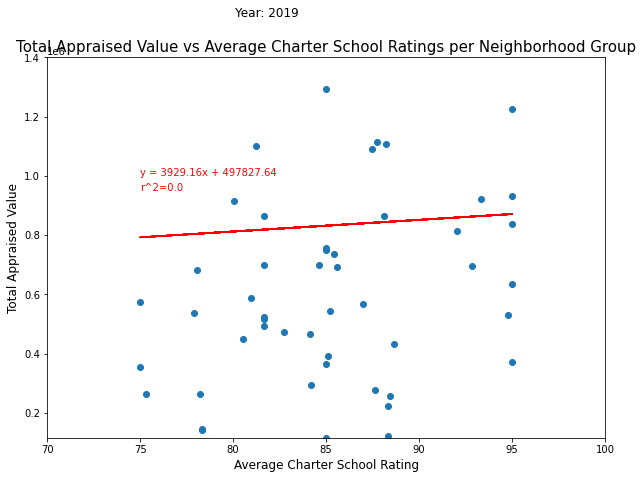

<Figure size 432x288 with 0 Axes>

In [30]:
# plot average charter school ratings vs property values per neighborhood grooup and add a linear regression
correlation = st.pearsonr(charter_neighborhood_group["Average School Rating"],
                          charter_neighborhood_group["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(charter_neighborhood_group["Average School Rating"],
                                                           charter_neighborhood_group["TOTAL_APPRAISED_VALUE"])
regress_values = charter_neighborhood_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig9,ax = plt.subplots(figsize=(10,7))
chart9 = ax.scatter(charter_neighborhood_group['Average School Rating'],charter_neighborhood_group["TOTAL_APPRAISED_VALUE"])
plt.plot(charter_neighborhood_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.95e6),fontsize=10,color='red')
plt.xlabel('Average Charter School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Charter School Ratings per Neighborhood Group", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(charter_neighborhood_group["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()
plt.savefig("Output/appraised_value_vs_charter_school_ratings.png")

##  Remove Charter Schools From the Final Data

In [31]:
# create a dataset without charter schools
only_public_schools = data.drop(['Elementary Charter School ID','Elementary Charter School Name',
                                 'Elementary Charter School Rating','Charter Middle School ID',
                                 'Charter Middle School Name', 'Charter Middle School Rating',
                                 'Charter High School ID','Charter High School Name',
                                 'Charter High School Rating'], axis=1)

value_2019 = only_public_schools['TOTAL_APPRAISED_VALUE_2019']
value_2018 = only_public_schools['TOTAL_APPRAISED_VALUE_2018']
only_public_schools["pct_change"] = (value_2019-value_2018)/value_2018*100

In [32]:
# add column to track sale activity in the year 2019
only_public_schools["Sale Year"] = only_public_schools["NEW_OWNER_DATE"].str.split('-').str[0]
only_public_schools['2019 Sales']=np.where(only_public_schools['Sale Year']=='2019',1,0)
only_public_schools.to_csv("Output/combined_data_without_charter_schools.csv",index=False)
only_public_schools.head()

,Address,Latitude,Longitude,Flood Description,Flood Zone,Flood Risk,SITE_ADDR_1,ACCOUNT,TAX_YEAR,SITE_ADDR_2,...,change_assessed_value_2018_2019,change_total_appraised_value_2018_2019,change_total_market_value_2018_2019,pct_change_land_value_2018_2019,pct_change_assessed_value_2018_2019,pct_change_total_appraised_value_2018_2019,pct_change_total_market_value_2018_2019,pct_change,Sale Year,2019 Sales
0,"2202 CAROLINE ST HOUSTON, Texas 77002",29.74614,-95.36987,AREA OF MINIMAL FLOOD HAZARD,X,3,2202 CAROLINE ST,21750000003,2019,HOUSTON,...,0.0,0.0,0.0,88856.0,298900.0,298900.0,298900.0,0.000000,2009,0
1,"2218 CAROLINE ST HOUSTON, Texas 77002",29.74605,-95.37014,AREA OF MINIMAL FLOOD HAZARD,X,3,2218 CAROLINE ST,21750000013,2019,HOUSTON,...,0.0,0.0,0.0,674900.0,814900.0,814900.0,814900.0,0.000000,1995,0
2,"2204 CAROLINE ST HOUSTON, Texas 77002",29.74619,-95.36996,AREA OF MINIMAL FLOOD HAZARD,X,3,2204 CAROLINE ST,21750000018,2019,HOUSTON,...,0.0,0.0,0.0,84437.0,296300.0,296300.0,296300.0,0.000000,2018,0
3,"2206 CAROLINE ST HOUSTON, Texas 77002",29.74624,-95.37004,AREA OF MINIMAL FLOOD HAZARD,X,3,2206 CAROLINE ST,21750000019,2019,HOUSTON,...,0.0,0.0,0.0,88136.0,299703.0,299703.0,299703.0,0.000000,2001,0
4,"1114 CHAPMAN ST HOUSTON, Texas 77002",29.77044,-95.35299,AREA OF MINIMAL FLOOD HAZARD,X,3,1114 CHAPMAN ST,91190000006,2019,HOUSTON,...,8073.0,8073.0,8073.0,105247.0,142407.0,142407.0,142407.0,6.005177,2018,0


In [33]:
# set up data for correlation matrix
correlation_data = only_public_schools[['Flood Risk','TOTAL_BUILDING_AREA','ACREAGE','TOTAL_APPRAISED_VALUE',
                                        'crime_rank','Average School Rating','pct_change','2019 Sales']]
correlation_data.head()

,Flood Risk,TOTAL_BUILDING_AREA,ACREAGE,TOTAL_APPRAISED_VALUE,crime_rank,Average School Rating,pct_change,2019 Sales
0,3,1944,0.0405,299000.0,1.0,80.000000,0.000000,0
1,3,2471,0.3099,815000.0,1.0,81.666667,0.000000,0
2,3,1944,0.0348,296400.0,1.0,80.000000,0.000000,0
3,3,1944,0.0395,299803.0,1.0,80.000000,0.000000,0
4,3,1444,0.1156,142507.0,1.0,78.333333,6.005177,0


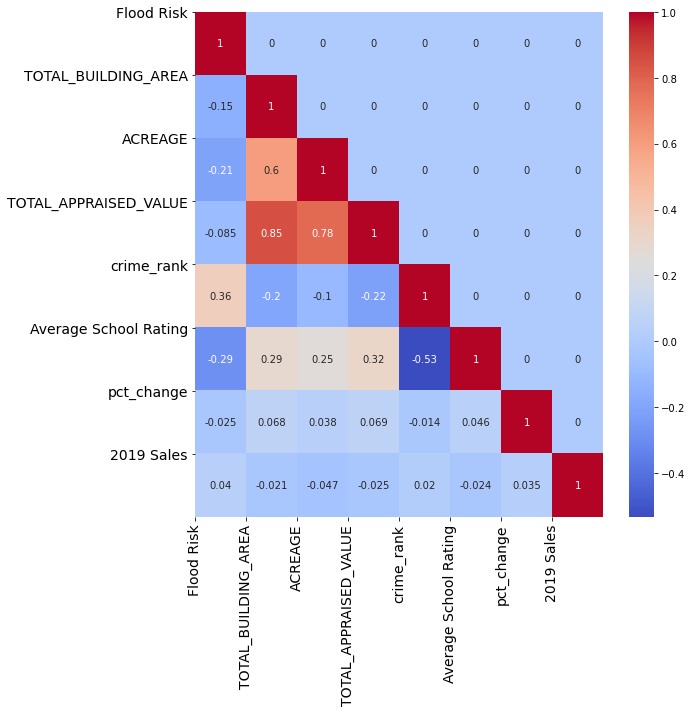

In [34]:
# create a correlation matrix
corr = correlation_data.corr()
corr = corr.unstack().sort_values()
corr = corr.unstack()
corr2=np.tril(corr, k=0)
f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr2,cmap="coolwarm",annot=True)
mask = np.triu(np.ones_like(corr2, dtype=np.bool))
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=90)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=0)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
plt.tight_layout()
plt.savefig("Output/correlation_matrix.png")